# Preprocessing Data

The goal of this notebook is to explore multiple regression and feature engineering Sklearn functions.

In this notebook you will use data preprocessinh etchon house sales in California to predict prices using multiple, polynomial, ridge, and lasson regression. You will:
* Learn to handle missing data
* Apply feature encoding to appropriate data types
* Learn when to use Standardization vs Normalization
* Apply Interquartile and standard deviation methods for outlier detection 
* Create new features using feature engineering
* Compute correlation coefficients and interpret the results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
from itertools import combinations

# 1. Import in house data

In [2]:
# Read dataset locally on computer
df = pd.read_csv('/Users/zizhengdong/Documents/GitHub/homework-0-zizhengdong0412/datasets/housing_dataset.csv')

In [3]:
# Inspect the dataset
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20634.000000  20622.000000        20628.000000  20633.000000   
mean    -119.568930     35.629984           28.627400   2636.036640   
std        2.003309      2.135938           12.578766   2181.812336   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.797500     33.930000           18.000000   1448.000000   
50%     -118.490000     34.250000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20412.000000  20623.000000  20632.000000   20628.000000   
mean       537.973104   1425.785822    499.615161       3.871190   
std        421.485694   1132.484600    382.380686       1.899747   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    788.000000    280.000000       2.563975   
50%        435.000000   1167.000000    409.000000       3.535250   
75%        647.000000   1725.000000    605.000000       4.743775   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20636.000000  
mean        206857.824239  
std         115403.235750  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

# 2. Explore Dataset

In [4]:
# Histogram
def plot_histogram(df, feature):
    fig = px.histogram(data_frame=df,
                            x=feature,
                            range_x=[df[feature].min(),
                                     df[feature].max()])
    return fig

In [5]:
feature = 'longitude'
fig = plot_histogram(df, feature)
fig.show()

In [6]:
# Boxplot
def plot_box(df, feature):
    fig = px.histogram(data_frame=df,
                            x=feature, 
                            range_x=[df[feature].min(),
                                     df[feature].max()])
    return fig

In [7]:
feature = 'total_rooms'
fig = plot_box(df, feature)
fig.show()

In [8]:
# Scatter plot
def scatter_plot(df, feature1, feature2):
    #feature1 = 'longitude'
    #feature2 = 'latitude'
    fig = px.scatter(data_frame=df,
                x=feature1, y=feature2,
                range_x=[df[feature1].min(),
                df[feature1].max()],
                range_y=[df[feature2].min(),
                df[feature2].max()])
    return fig

In [10]:
feature1 = 'longitude'
feature2 = 'latitude'
fig = scatter_plot(df, feature1, feature2)
fig.show()

In [11]:
# Line plot 
def line_plot(df, feature1, feature2):
    #feature1 = 'housing_median_age'
    #feature2 = 'total_rooms'
    fig = px.line(data_frame=df,
                x=feature1, y=feature2,
                range_x=[df[feature1].min(),
                df[feature1].max()],
                range_y=[df[feature2].min(),
                df[feature2].max()])
    return fig

In [12]:
feature1 = 'housing_median_age'
feature2 = 'total_rooms'
fig = line_plot(df, feature1, feature2)
fig.show()

# 3. Cleaning data

### Handling Missing Data

In [13]:
### View data with missing values or invalid inputs

top_n=3 # Used for top categories with missing data
missing_column_counts = df[df.columns[df.isnull().any()]].isnull().sum()
max_idxs = np.argsort(missing_column_counts.to_numpy())[::-1][:top_n]

# Compute missing statistics
num_categories = df.isna().any(axis=0).sum()
average_per_category = df.isna().sum().sum()/len(df.columns)
total_missing_values = df.isna().sum().sum()
top_missing_categories = df.columns[max_idxs[:top_n]].to_numpy()
    
print('Number of categories with missing values: {0:.2f}'.format(num_categories))
print('Average number of missing values per category: {0:.2f}'.format(average_per_category))
print('Total number of missing values: {0:.2f}'.format(total_missing_values))
print('Top {} categories with most missing values: {}'.format(top_n, top_missing_categories))

Number of categories with missing values: 10.00
Average number of missing values per category: 33.00
Total number of missing values: 330.00
Top 3 categories with most missing values: ['total_bedrooms' 'ocean_proximity' 'latitude']


In [14]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0             NaN  


In [19]:
### Remove irrelevant / useless features
remove_feature = ['households']
df.drop(remove_feature, axis=1)

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  median_income  median_house_value ocean_proximity  
0           322.0         8.3252            452600.0        NEAR BAY  
1          2401.0         8.3014            358500.0        NEAR BAY  
2           496.0         7.2574            352100.0        NEAR BAY  
3           558.0         5.6431            341300.0        NEAR BAY  
4           565.0         3.8462            342200.0             NaN  
...           ...            ...                 ...             ...  
20635       845.0         1.5603             78100.0          INLAND  
20636       356.0         2.5568             77100.0          INLAND  
20637      1007.0         1.7000             92300.0          INLAND  
20638       741.0         1.8672             84700.0          INLAND  
20639      1387.0         2.3886             89400.0          INLAND  

[20640 rows x 9 columns]

In [20]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0             NaN  


In [21]:
nan_colns = df.columns[df.isna().any()].tolist()
numeric_columns = list(df.select_dtypes(['float','int']).columns)

Imputing features: zero

In [22]:
feature = 'population'
df[feature].fillna(0, inplace=True)

In [23]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0             NaN  


Imputing features: mean

In [24]:
feature = 'population'
df[feature].fillna(value=df[feature].mean(), inplace=True)

In [25]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0             NaN  


Imputing features: median

In [26]:
feature = 'population'
df[feature].fillna(value=df[feature].median(), inplace=True)

In [27]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0             NaN  


Imputing features: drop Nans

In [28]:
df.dropna(0, inplace=True)

/var/folders/6c/sgccp3hn0n5f2v4fcrxvyjn80000gn/T/ipykernel_17016/1549782735.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



In [31]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
5         0.0       193.0         4.0368            269700.0        NEAR BAY

# 4. Feature Encoding

Handling Text and Categorical Attributes

In [32]:
# Let's preprocess categorical data starting with Integer encoding transforms categorical data to integers

# Integer encoding
feature = 'ocean_proximity'
enc = OrdinalEncoder()
df[[feature+'_int']] = enc.fit_transform(df[[feature]])

One-hot encoding transforms categorical data to n bits where a unique bit is set to 1 for each category

In [33]:
print(df.head())
df = pd.get_dummies(df, columns = ['ocean_proximity']) # one-hot encoding
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  \
0       322.0       126.0         8.3252            452600.0        NEAR BAY   
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY   
2       496.0       177.0         7.2574            352100.0        NEAR BAY   
3       558.0       219.0         5.6431            341300.0        NEAR BAY   
5         0.0       193.0         4.0368            269700.0        NEAR BAY   

   ocean_proximity_int  
0                  3.0  
1                 

# 5. Feature Scaling

Standardization: (x – min)/(max – min)

In [34]:
feature = 'total_rooms'
df[feature+'_std'] = (df[feature] - df[feature].mean()) / df[feature].std()

Normalization: (x – mean)/standard deviation

In [35]:
feature = 'total_rooms'
df[feature+'_norm'] = (df[feature] - df[feature].min()) / df[feature].max() - df[feature].min()

Logarithm: log(x)

In [36]:
feature = 'total_rooms'
df[feature+'_log'] = np.log(df[feature])

Recall: Machine learning algorithms perform better on Gaussian-like data distributions (also known as a bell curve). Observe features that are and are NOT Gaussian-like. 
- If data is Gaussian-like, use normalization: transforms data to values that sum to 1 using data min and max
- If data is not Gaussian-like, use standardization: transforms data to Gaussian distribution (looks like a bell curve) with values that sum to 1 using data mean and standard deviation
- If data is Guassian-like, and right or left skewed, use log

# 6. Feature Engineering

Although we often think of multiple regression as including multiple different features (e.g. # of bedrooms, squarefeet, and # of bathrooms) but we can also consider transformations of existing features e.g. the log of the squarefeet or even "interaction" features such as the product of bedrooms and bathrooms.

You will use the logarithm function to create a new feature. so first you should import it from the math library.

Next create the following 4 new features as column in both TEST and TRAIN data:
* total_rooms_squared = total_rooms\*total_rooms
* age_bath_rooms = housing_median_age\*total_bedrooms
* log_population = log(population)
* lat_plus_long = lat + long 
As an example here's the first one:

In [37]:
### bedrooms_squared = bedrooms*bedrooms
df['total_rooms_squared'] = df['total_rooms'].apply(lambda x:x**2)

### age_bathrooms = housing_age_bedrooms
def multiply_data(value_1, value_2):
    return value_1 * value_2

df['age_bath_rooms'] = df.apply(lambda x: multiply_data(x['housing_median_age'],x['total_bedrooms']),axis=1)

Create the following new features:
* log_population = log(population)
* lat_plus_long = lat + long 
* rooms_per_household = total_rooms/households
* bedrooms_per_room = total_bedrooms/total_rooms
* population_per_household = population/households
* age_rooms_per_household = housing_median_age*rooms_per_household

In [38]:
# Activity 
# [Ans]
df['log_population'] = df['population'].apply(lambda x: np.log(x))

def add_data(value_1, value_2):
    return value_1 + value_2

df['lat_plus_long'] = df.apply(lambda x: multiply_data(x['longitude'],x['latitude']),axis=1)

df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"]/df["total_rooms"]
df["population_per_household"]=df["population"]/df["households"]
df['age_rooms_per_household' ] = multiply_data(df['housing_median_age'],df['rooms_per_household'])
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
5         0.0       193.0         4.0368            269700.0   

   ocean_proximity_int  ...  total_rooms_norm  total_rooms_log  \
0                  3.0  ...         -1.977670         6.779922   
1                  3.0  ...     

# 7. Detecting Outliers

Visualize data features

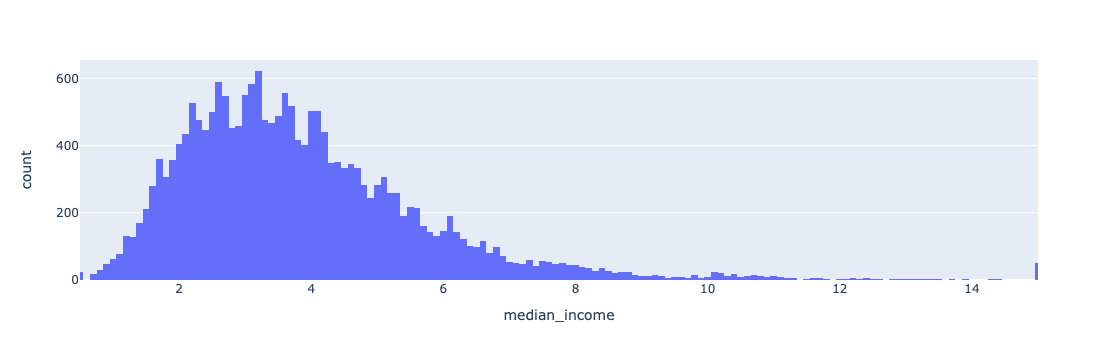

In [39]:
feature = 'median_income'
plot_histogram(df, feature)

Remove outliers Using IQR: Q3 - Q1

The upper bound is 8.0122
The lower bound is -0.7029999999999998


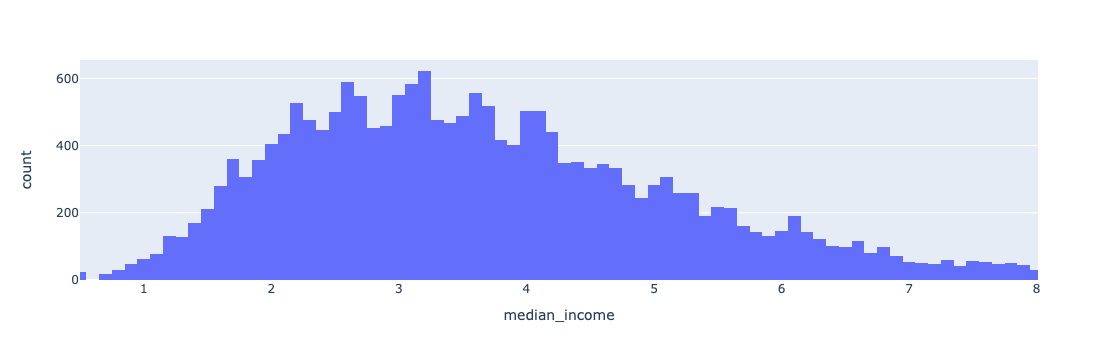

In [40]:
lower_bound=None
upper_bound=None
if(feature in df.columns):
    Q1 = np.percentile(df[feature], 25, axis=0)
    Q3 = np.percentile(df[feature], 75, axis=0)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5*IQR
    lower_bound = Q1 - 1.5*IQR
    df = df[df[feature]>lower_bound]
    df = df[df[feature]<upper_bound]
print('The upper bound is {}'.format(upper_bound))
print('The lower bound is {}'.format(lower_bound))
plot_histogram(df, feature)

Remove outliers Using STD

The upper bound is 66.11207032161208
The lower bound is -8.943302529826799


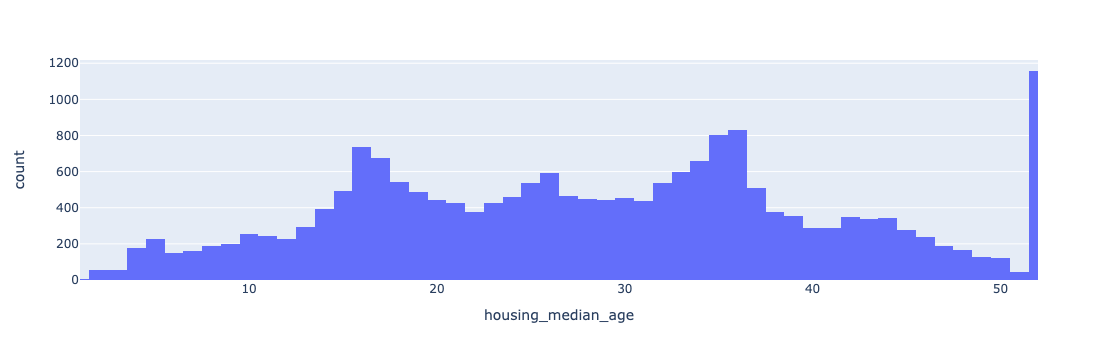

In [41]:
feature = 'housing_median_age'
lower_bound=None
upper_bound=None
if(feature in df.columns):
    upper_bound = df[feature].mean() + 3* df[feature].std() #mean + 3*std
    lower_bound = df[feature].mean() - 3* df[feature].std() #mean - 3*std
    df = df[df[feature]>lower_bound]
    df = df[df[feature]<upper_bound]
print('The upper bound is {}'.format(upper_bound))
print('The lower bound is {}'.format(lower_bound))
plot_histogram(df, feature)

# 8. Correlation Analysis

Compute correlation coefficient: \sum{(x_i - x_mean) - (y_i - y_mean)} / sqrt{ (x_i - x_mean)^2 * (y_i - y_mean)^2 }

In [42]:
features = ['total_bedrooms','housing_median_age']
x = df['total_bedrooms']
y = df['housing_median_age']

In [43]:
numerator = np.sum((x - x.mean()) * (y - y.mean()))

In [44]:
denominator = np.sqrt(np.sum((x - x.mean())*(x - x.mean())) * np.sum((y - y.mean())*(y - y.mean())))

In [45]:
correlation = numerator/denominator
print(correlation)

-0.322714875627357


Compute correlation using pandas correlation function

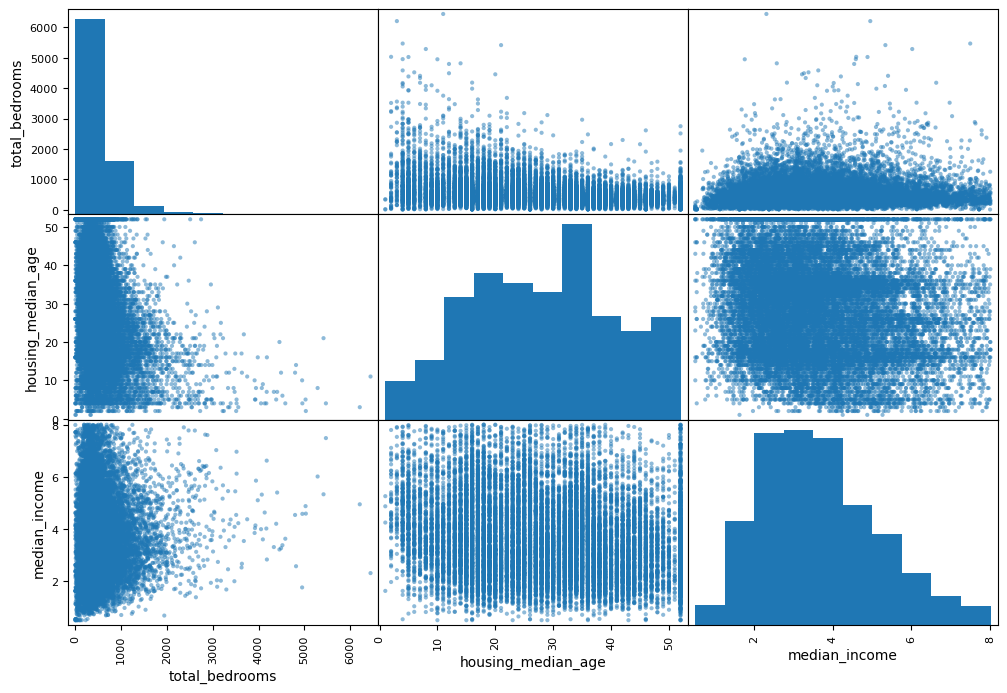

In [46]:
features = ['total_bedrooms','housing_median_age','median_income']
fig = scatter_matrix(df[features], figsize=(12, 8))
plt.show(fig[0][0].get_figure())

# State the correlation magnitude and direction
correlation = df[features].corr()

In [47]:
cor_summary_statements=[]
feature_pairs = combinations(features, 2)
for f1, f2 in feature_pairs:
    cor = correlation[f1][f2]
    if(abs(cor) > 0.5):
        print('{} and {} are strongly correlation: {}'.format(f1,f2,cor))
    else:
        print('{} and {} are weakly correlation {}'.format(f1,f2,cor))
        
    if(cor < 0):
        print('{} and {} are negativey correlation {}'.format(f1,f2,cor))
    else:
        print('{} and {} are positively correlation {}'.format(f1,f2,cor))

total_bedrooms and housing_median_age are weakly correlation -0.3227148756273589
total_bedrooms and housing_median_age are negativey correlation -0.3227148756273589
total_bedrooms and median_income are weakly correlation 0.029168584058556945
total_bedrooms and median_income are positively correlation 0.029168584058556945
housing_median_age and median_income are weakly correlation -0.15637189026209322
housing_median_age and median_income are negativey correlation -0.15637189026209322


Takeaway: Corrleation helps ML engineers detect when input features are redundant for learning some target variable. Avoid training models with features that are correlated so the model learns unique patterns in each feature.